In [1]:
import os

import gensim
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.manifold import TSNE

%matplotlib inline

Using Theano backend.


In [2]:
# Loading patient2vec model
PATIENT2VEC_MODEL_DIR = "../patient2vec/models_improved/"
PATIENT2VEC_MODEL = "patient2vec_pvdbow_hs_win-30_emb-100.gen"

patient2vec = gensim.models.Doc2Vec.load(os.path.join(PATIENT2VEC_MODEL_DIR, PATIENT2VEC_MODEL))

In [3]:
# Loading Diabetes patients

all_patients = pd.read_csv('../diabetes/data/intermediate/patient_list_split.csv')
diabetes_indexes = np.where(all_patients["OUTCOME"].values == 1)
control_indexes = np.where(all_patients["OUTCOME"].values == 0)

In [4]:
p2v_vectors = [] #np.zeros((len(diabetes_ptids)+len(controls_ptids), 300))

for i, ptid in enumerate(all_patients["IND_SEQ"]):
    p2v_vectors.append(patient2vec.docvecs[str(ptid)])

In [5]:
p2v_vectors = np.array(p2v_vectors)

CPU times: user 9min 23s, sys: 33.5 s, total: 9min 56s
Wall time: 10min
5


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


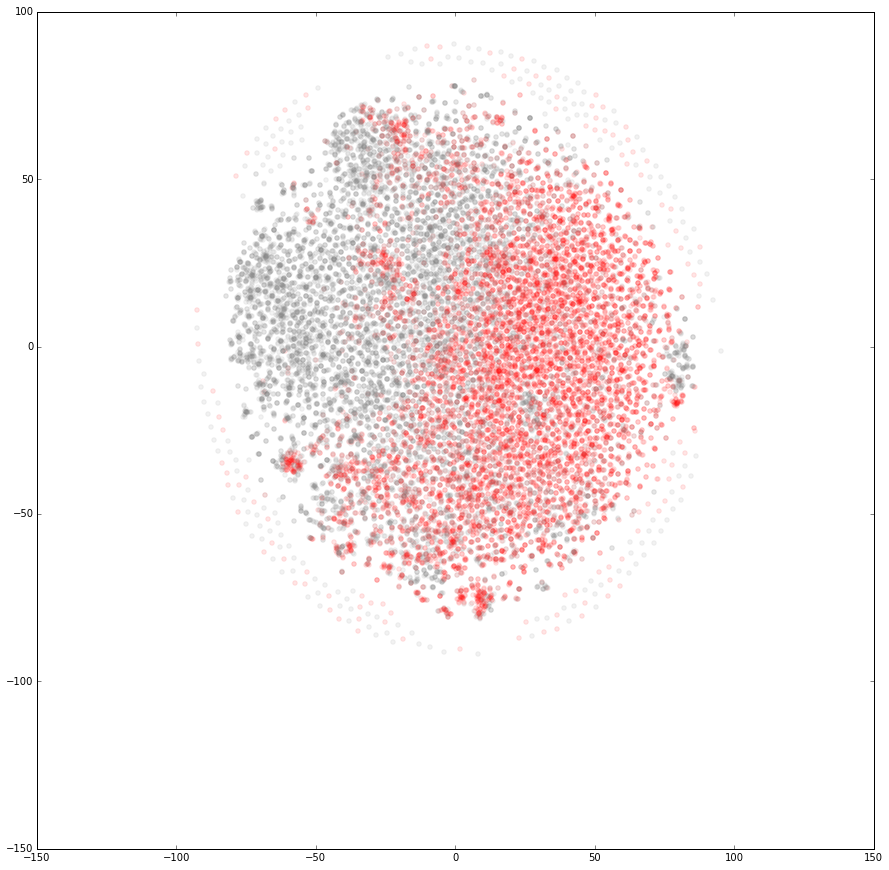

CPU times: user 11min 6s, sys: 39.8 s, total: 11min 46s
Wall time: 12min 5s
10


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


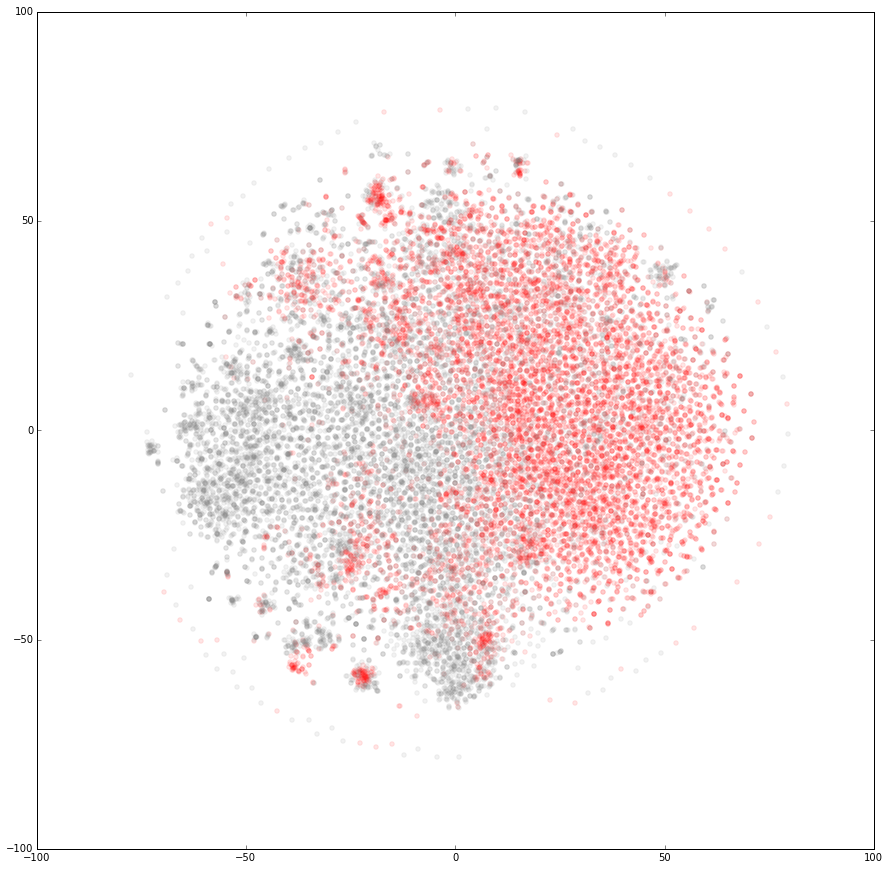

CPU times: user 12min 58s, sys: 43.6 s, total: 13min 42s
Wall time: 14min 14s
20


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


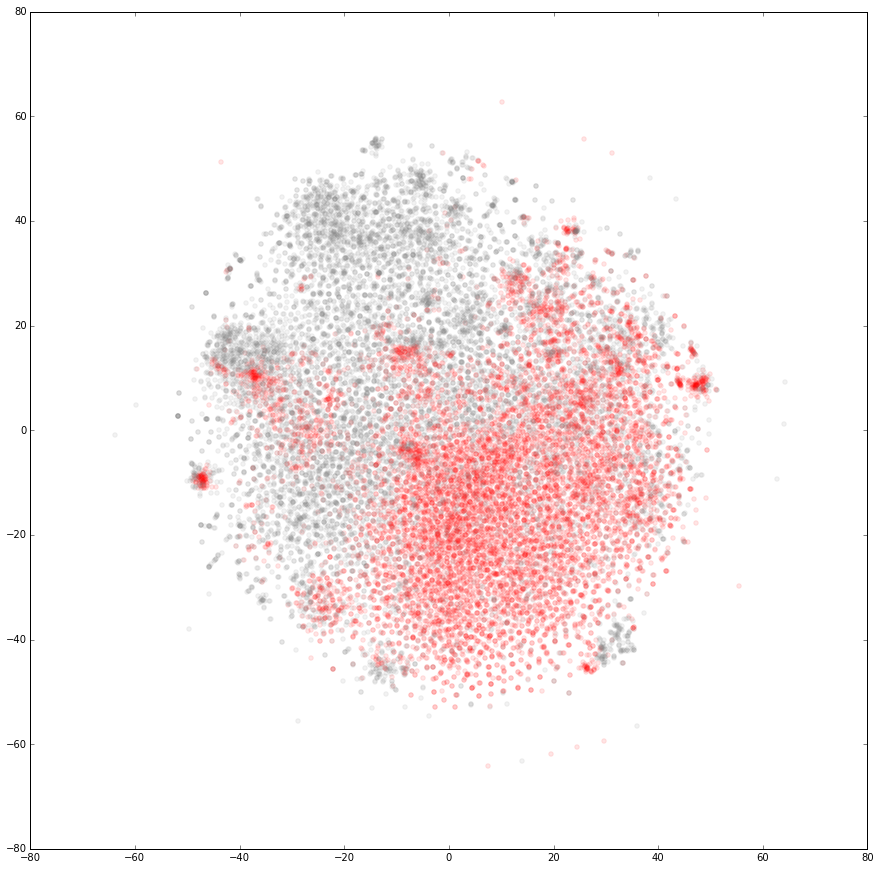

CPU times: user 14min 23s, sys: 46.3 s, total: 15min 10s
Wall time: 15min 47s
30


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


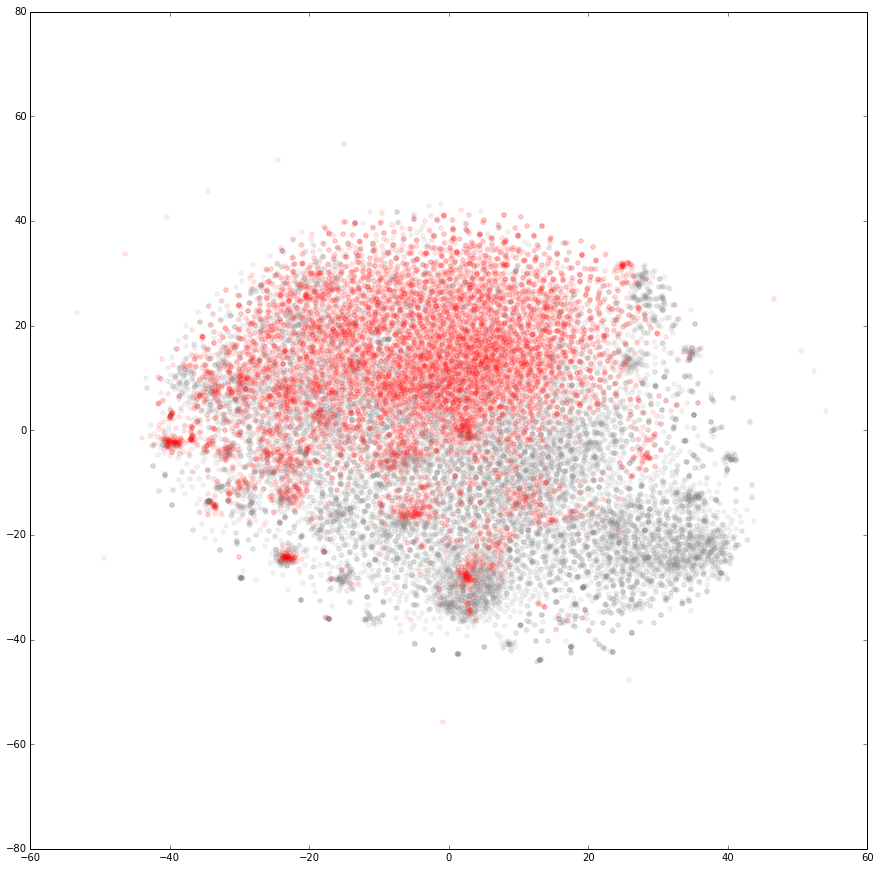

CPU times: user 20min 13s, sys: 54 s, total: 21min 7s
Wall time: 22min 4s
50


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


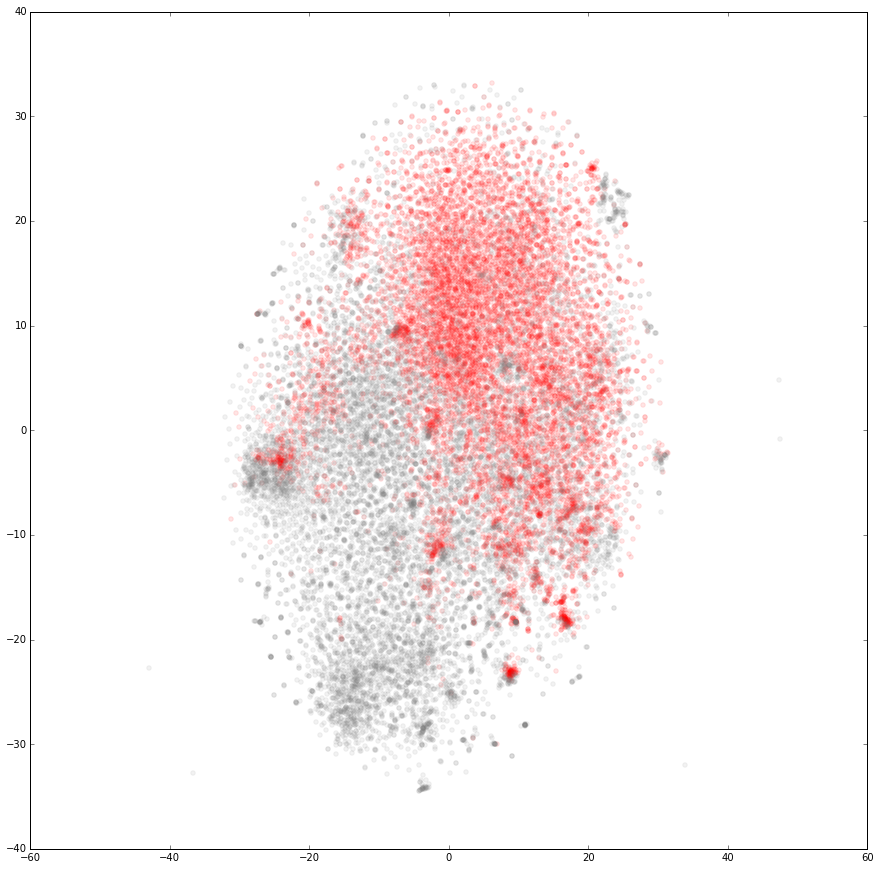

CPU times: user 23min 19s, sys: 1min, total: 24min 20s
Wall time: 25min 9s
80


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


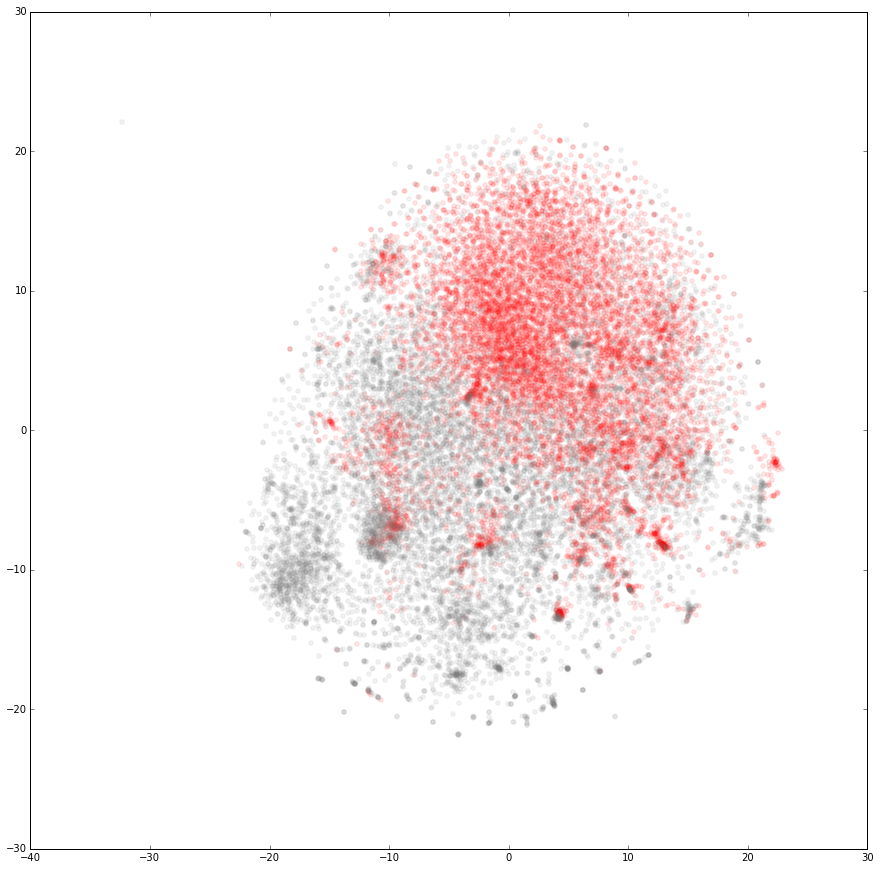

In [6]:
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

perplexities = [5, 10, 20, 30, 50, 80]
Y = {}

for p in perplexities:
    tsne = TSNE(perplexity=p)
    %time Y[p] = tsne.fit_transform(p2v_vectors)
    print(p)
    plt.scatter(Y[p][diabetes_indexes][:,0], Y[p][diabetes_indexes][:,1], color='red', alpha=0.1)
    plt.scatter(Y[p][control_indexes][:,0], Y[p][control_indexes][:,1], color='grey', alpha=0.1)
    plt.show()


In [8]:
import random

all_p2v_patients = list(patient2vec.docvecs.doctags.keys())

random.seed(1)

random_patients = random.sample(all_p2v_patients, 100000)

p2v_vectors = p2v_vectors.tolist()

for p in random_patients:
    v = patient2vec.docvecs[str(p)]
    p2v_vectors.append(v)


In [9]:
p2v_vectors_np = np.array(p2v_vectors)

In [10]:
p2v_vectors_np.shape

(120954, 100)

CPU times: user 2h 15min 17s, sys: 4min 17s, total: 2h 19min 35s
Wall time: 2h 26min 33s
5


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


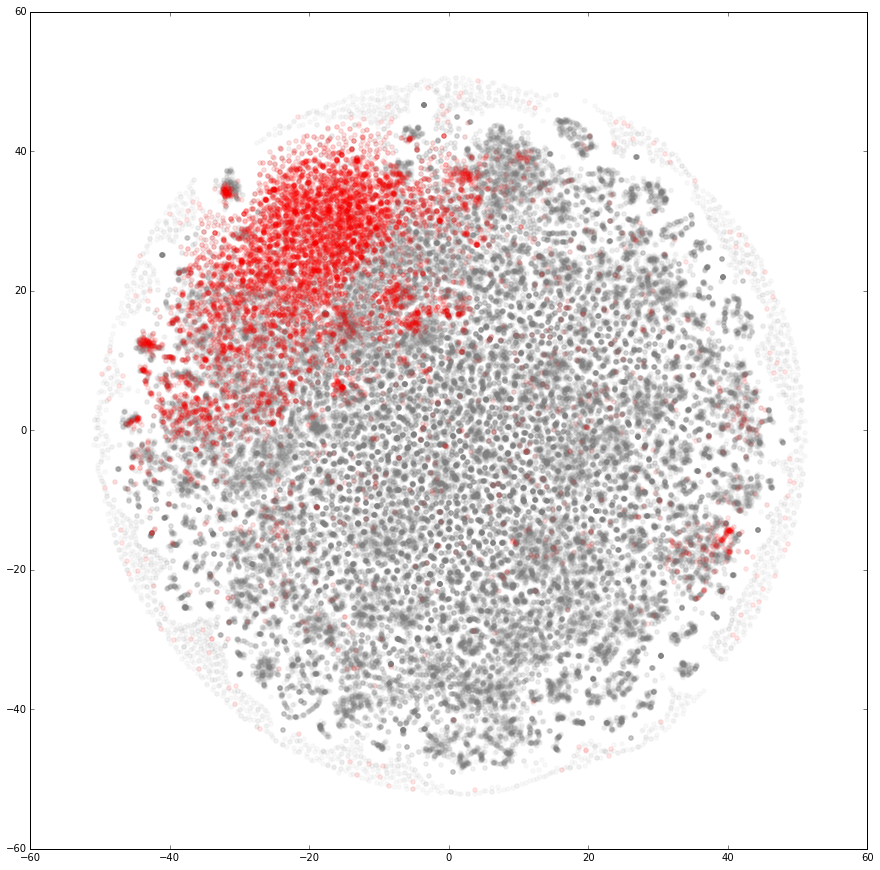

CPU times: user 2h 21min 58s, sys: 4min 2s, total: 2h 26min
Wall time: 2h 27min 3s
15


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


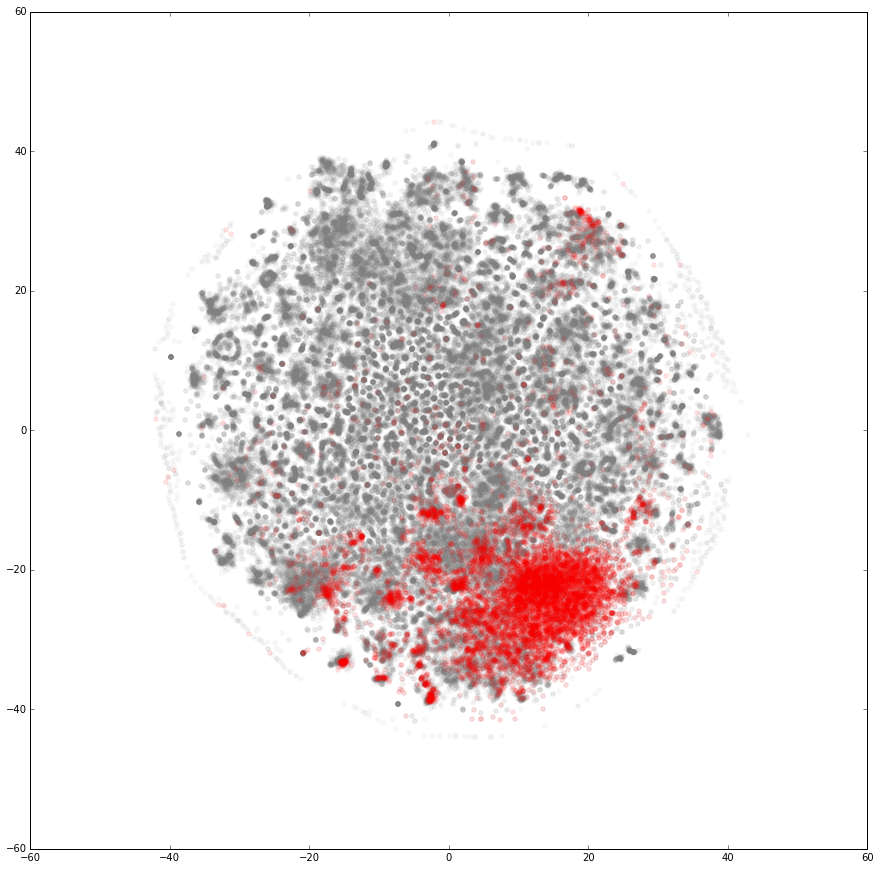

CPU times: user 2h 38min 55s, sys: 4min 54s, total: 2h 43min 49s
Wall time: 2h 45min
30


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


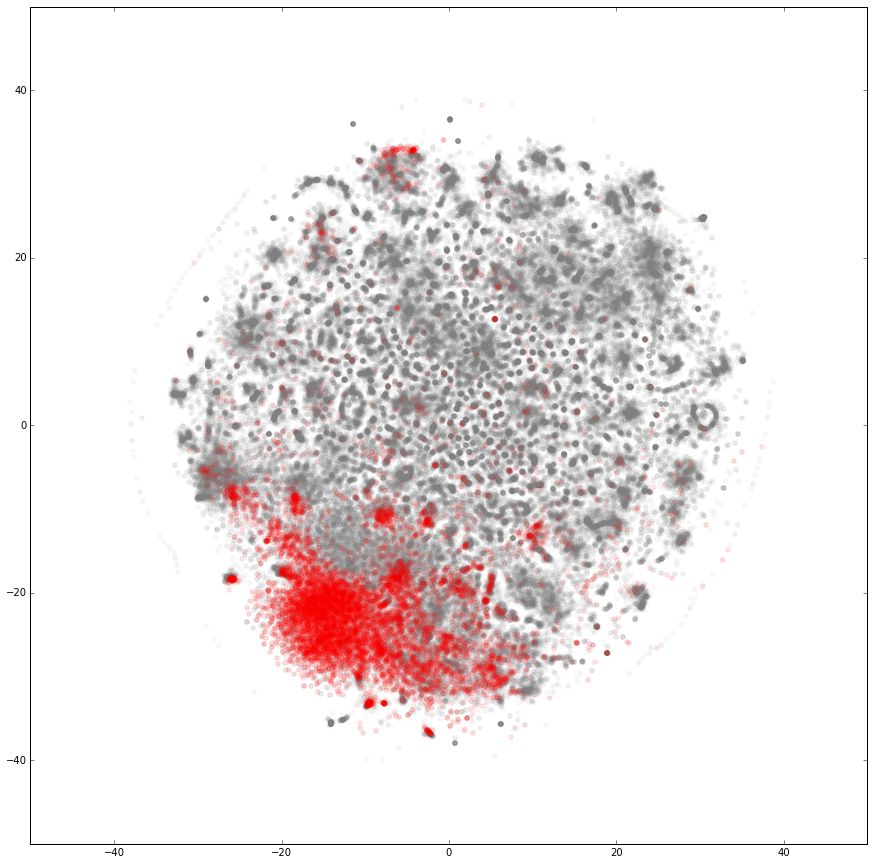

CPU times: user 2h 58min 12s, sys: 6min 14s, total: 3h 4min 26s
Wall time: 3h 5min 39s
50


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


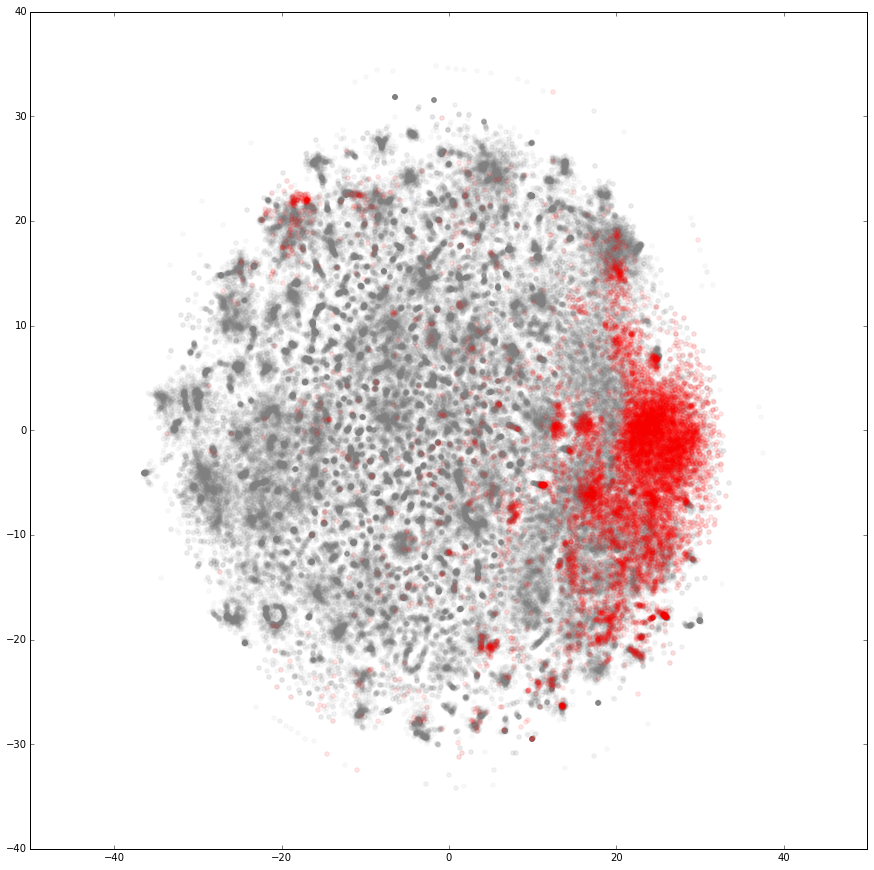

In [11]:
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)


perplexities = [5, 15, 30, 50]
Y_all = {}

for p in perplexities:
    tsne = TSNE(perplexity=p)
    %time Y_all[p] = tsne.fit_transform(p2v_vectors_np)
    print(p)
    other_indexes = list(range(0, len(Y_all[p])))
    for v in (diabetes_indexes[0].tolist()+control_indexes[0].tolist()):
        other_indexes.remove(v)
    
    plt.scatter(Y_all[p][other_indexes][:,0], Y_all[p][other_indexes][:,1], color='grey', alpha=0.05)
    plt.scatter(Y_all[p][control_indexes][:,0], Y_all[p][control_indexes][:,1], color='grey', alpha=0.1)
    plt.scatter(Y_all[p][diabetes_indexes][:,0], Y_all[p][diabetes_indexes][:,1], color='red', alpha=0.1)
    plt.show()